<a href="https://colab.research.google.com/github/SnehaGhosh10/Crop-disease-detection-cnn/blob/main/CROP_DISEASES_DETECTION_SYSTEM_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import BatchNormalization, Dropout
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [ ]:
dataset_path = "/content/drive/MyDrive/minifinal/PlantVillage"
train_path = "/content/drive/MyDrive/minifinal/PlantVillage/train_data"
test_path = "/content/drive/MyDrive/minifinal/PlantVillage/test_data"

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Train and Test Generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 1068 images belonging to 25 classes.
Found 354 images belonging to 25 classes.


In [ ]:
# CNN Model
cnn = tf.keras.models.Sequential()

# Convolution Layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolution Layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer (25 classes)
cnn.add(tf.keras.layers.Dense(units=25, activation='softmax'))

# Compile Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
cnn.summary()

# Fit Model
history = cnn.fit(
    x=train_generator,
    validation_data=test_generator,
    epochs=30
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,957,433 (45.61 MB)

 Trainable params: 11,957,433 (45.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 341s 10s/step - accuracy: 0.0553 - loss: 3.8012 - val_accuracy: 0.1412 - val_loss: 3.0009
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.1236 - loss: 2.9778 - val_accuracy: 0.2006 - val_loss: 2.5335
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.2171 - loss: 2.5489 - val_accuracy: 0.3305 - val_loss: 2.2018
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.3046 - loss: 2.1974 - val_accuracy: 0.4237 - val_loss: 1.8153
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.3623 - loss: 1.9232 - val_accuracy: 0.4153 - val_loss: 1.7005
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.3590 - loss: 1.8572 - val_accuracy: 0.4124 - val_loss: 1.7519
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.3942 - loss: 1.7116 - val_accuracy: 0.4689 - val_loss: 1.4302
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4292 - loss: 1.4925 - val_accuracy: 0.4802 - 

In [ ]:
# Evaluate Model
scores = cnn.evaluate(train_generator)
scores2 = cnn.evaluate(test_generator)

print("\nTraining Loss: " + str(scores[0]))
print("Validation Loss: " + str(scores2[0]))
print("Validation Accuracy: " + str(scores2[1]*100) + " %")

34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6235 - loss: 0.7455
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.5884 - loss: 0.8693

Training Loss: 0.7592697143554688
Validation Loss: 0.8178878426551819
Validation Accuracy: 58.75706076622009 %


In [ ]:
# Predictions for Training and Test Sets
train_true_classes = train_generator.classes
train_predicted_classes = np.argmax(cnn.predict(train_generator), axis=1)

test_true_classes = test_generator.classes
test_predicted_classes = np.argmax(cnn.predict(test_generator), axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Unique classes and label mapping
unique_classes = np.unique(test_true_classes)
filtered_class_labels = [class_labels[i] for i in unique_classes]


34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 784ms/step


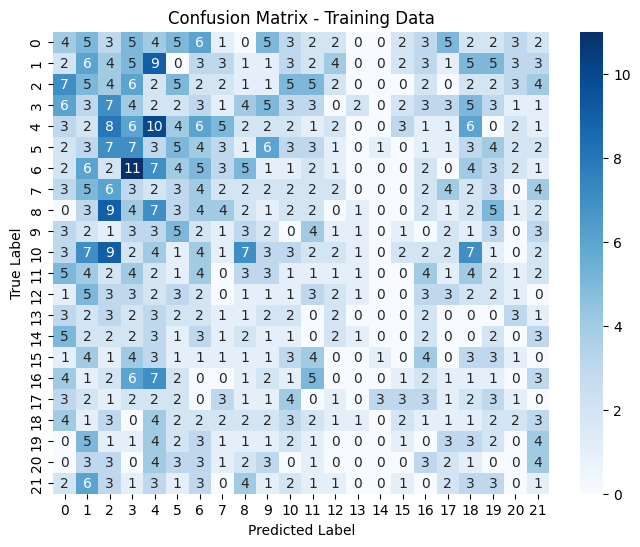

In [ ]:
# Confusion Matrix - Training
train_cm = confusion_matrix(train_true_classes, train_predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Data')
plt.show()

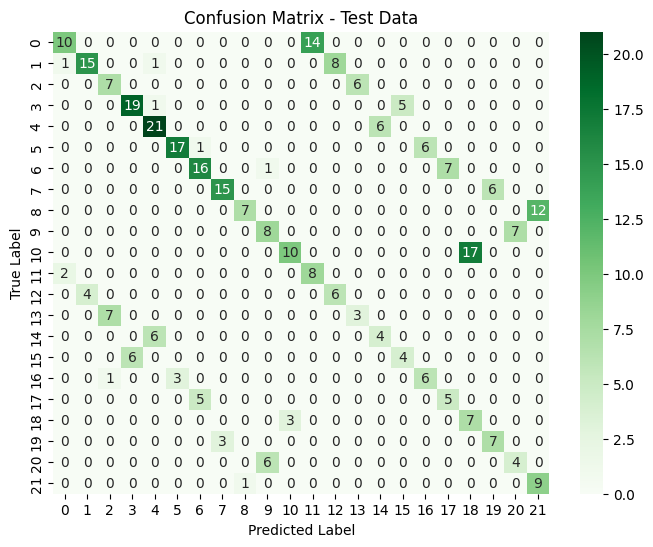

In [ ]:
# Confusion Matrix - Test
test_cm = confusion_matrix(test_true_classes, test_predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [ ]:
# Classification Report - Test
report = metrics.classification_report(test_true_classes, test_predicted_classes, target_names=filtered_class_labels, labels=unique_classes)
print("\nClassification Report (Test Data):")
print(report)


Classification Report (Test Data):
                                       precision    recall  f1-score   support

        Pepper__bell___Bacterial_spot       0.77      0.42      0.54        24
               Pepper__bell___healthy       0.79      0.60      0.68        25
                  Potato_Early_blight       0.47      0.54      0.50        13
                 Potato___Late_blight       0.76      0.76      0.76        25
                     Potato___healthy       0.72      0.78      0.75        27
                Tomato_Bacterial_spot       0.85      0.71      0.77        24
                  Tomato_Early_blight       0.73      0.67      0.70        24
                   Tomato_Late_blight       0.83      0.71      0.77        21
Tomato__Tomato_YellowLeaf__Curl_Virus       0.88      0.37      0.52        19
          Tomato__Tomato_mosaic_virus       0.53      0.53      0.53        15
                       Tomato_healthy       0.77      0.37      0.50        27
            pep

In [ ]:
# Performance Metrics - Test
test_accuracy = accuracy_score(test_true_classes, test_predicted_classes)
test_precision = precision_score(test_true_classes, test_predicted_classes, average='weighted')
test_recall = recall_score(test_true_classes, test_predicted_classes, average='weighted')
test_f1 = f1_score(test_true_classes, test_predicted_classes, average='weighted')

In [ ]:
# Standard Deviation of Predictions
test_std = np.std(test_predicted_classes - test_true_classes)

In [ ]:
# Print Performance Metrics
print("\nModel Performance on Test Data:")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Standard Deviation: {test_std:.4f}")


Model Performance on Test Data:
Accuracy: 58.76%
Precision: 0.6459
Recall: 0.5876
F1 Score: 0.5924
Standard Deviation: 7.0839


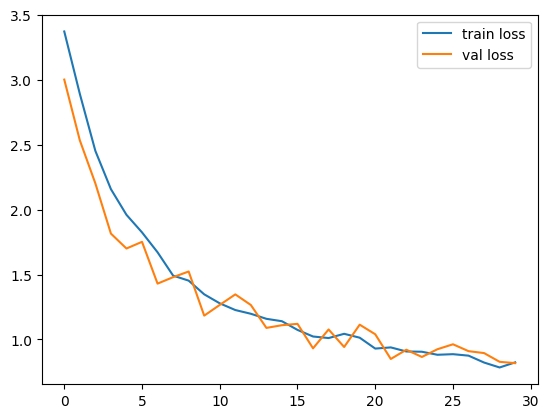

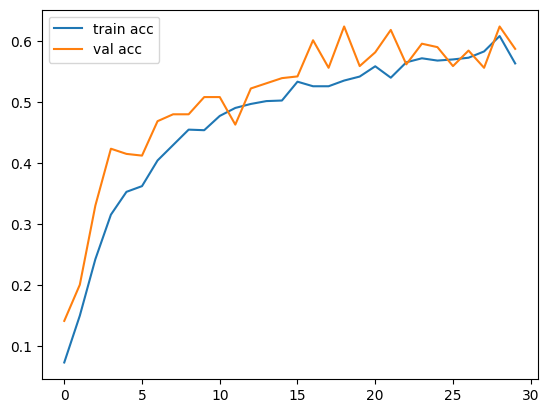

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss') # Replace temp with history
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
def predict_disease(image_path, model):
  img = image.load_img(image_path, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img / 255.0  # Rescale the image

  prediction = model.predict(img)
  predicted_class_index = np.argmax(prediction)

  # Get the class labels from the training generator
  class_labels = list(train_generator.class_indices.keys())
  predicted_disease = class_labels[predicted_class_index]

  return predicted_class_index, predicted_disease


image_path = "/content/drive/MyDrive/minifinal/PlantVillage/test_data/tomato_mosaicvirus/image85.JPG"
predicted_class_index, predicted_disease = predict_disease(image_path, cnn)

print("Predicted class index:", predicted_class_index)
print("Predicted disease:", predicted_disease)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class index: 10
Predicted disease: Tomato__Tomato_mosaic_virus
